# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
## Insights:
### There is a strong correlation between max temp and latitude.
### There is a weak to medium correlation between humidity and latitude and between wind speed and latitude.
### There is a weak correlation between cloudiness and latitude.

In [168]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [156]:
file = pd.read_csv(output_data_file)
file_df = pd.DataFrame(file)
file_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [157]:
file_df.shape

(548, 10)

## Generate Cities List

In [158]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [159]:
# Save the config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Set empty lists to hold data
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
win_speed = []
country = []
date = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-------------------------------")

# loop through each city
counter = 0
counter_id = 1
set_id = 1

for i in range(len(cities)):
    counter = counter + 1
    
    if counter < 50:
        set_id = set_id
        counter_id = counter_id + 1
    else:
        counter = 0
        counter_id = 1
        set_id = set_id + 1
     
    response = requests.get(query_url + cities[i])
    response_json = response.json()
    
    try:
        city.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        win_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        print(f"Processing Record {counter_id} of Set {set_id} | {cities[i]}")
        
    except:
        print("City not found. Skipping...")
        pass
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 2 of Set 1 | lazaro cardenas
Processing Record 3 of Set 1 | avila
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | jaisinghnagar
Processing Record 7 of Set 1 | derzhavinsk
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | shar
Processing Record 11 of Set 1 | albany
City not found. Skipping...
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | ugoofaaru
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | solnechnyy
Processing Record 18 of Set 1 | toyooka
Processing Record 19 of Set 1 | kita
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 23 of Set 1 | hithadhoo
Processing Record 24 of Set 1 | ava

Processing Record 5 of Set 5 | hit
Processing Record 6 of Set 5 | isangel
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | iqaluit
Processing Record 11 of Set 5 | tiksi
Processing Record 12 of Set 5 | mirnyy
Processing Record 13 of Set 5 | masoko
Processing Record 14 of Set 5 | te anau
Processing Record 15 of Set 5 | mokhsogollokh
Processing Record 16 of Set 5 | menongue
Processing Record 17 of Set 5 | aleksandrov gay
Processing Record 18 of Set 5 | kyshtym
Processing Record 19 of Set 5 | chicama
Processing Record 20 of Set 5 | san cristobal
Processing Record 21 of Set 5 | vardo
Processing Record 22 of Set 5 | magdagachi
Processing Record 23 of Set 5 | tura
Processing Record 24 of Set 5 | kieta
Processing Record 25 of Set 5 | talnakh
Processing Record 26 of Set 5 | colombo
City not found. Skipping...
Processing Record 28 of Set 5 | yerbogachen
Processing Record 29 of Set 5 | provideniya
Proce

Processing Record 12 of Set 9 | grindavik
Processing Record 13 of Set 9 | olafsvik
City not found. Skipping...
Processing Record 15 of Set 9 | khani
Processing Record 16 of Set 9 | denpasar
Processing Record 17 of Set 9 | hobyo
City not found. Skipping...
Processing Record 19 of Set 9 | beringovskiy
Processing Record 20 of Set 9 | mitsamiouli
Processing Record 21 of Set 9 | sawang daen din
Processing Record 22 of Set 9 | makat
Processing Record 23 of Set 9 | georgetown
Processing Record 24 of Set 9 | la rioja
Processing Record 25 of Set 9 | ilmajoki
Processing Record 26 of Set 9 | devils lake
Processing Record 27 of Set 9 | orhei
Processing Record 28 of Set 9 | shubarkuduk
Processing Record 29 of Set 9 | bonavista
Processing Record 30 of Set 9 | fortuna
Processing Record 31 of Set 9 | tabou
Processing Record 32 of Set 9 | parana
Processing Record 33 of Set 9 | tautira
Processing Record 34 of Set 9 | libertador general san martin
Processing Record 35 of Set 9 | rocha
Processing Record 3

Processing Record 12 of Set 13 | erzin
Processing Record 13 of Set 13 | uravakonda
Processing Record 14 of Set 13 | kenora
Processing Record 15 of Set 13 | burnie
Processing Record 16 of Set 13 | east stroudsburg
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [160]:
cities_data = pd.DataFrame({"City":city, 
                            "Lat":lat, 
                            "Lng":lng, 
                            "Max Temp":max_temp, 
                            "Humidity":humidity, 
                            "Cloudiness":cloudiness,
                            "Wind Speed":win_speed,
                            "Country":country,
                            "Date":date
                           })
cities_data.to_csv("output_data/citiesdata.csv", index=False, header=True)
cities_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lázaro Cárdenas,17.9583,-102.2000,24.61,75,82,1.70,MX,1619496156
1,Avila,40.5833,-5.0000,8.33,89,56,0.89,ES,1619496171
2,Bredasdorp,-34.5322,20.0403,14.00,88,97,1.54,ZA,1619496039
3,Ushuaia,-54.8000,-68.3000,6.00,87,40,1.03,AR,1619495977
4,Jaisinghnagar,23.7000,81.3833,35.71,6,76,1.75,IN,1619496172


In [161]:
cities_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.435275,15.153830,15.283321,70.220249,53.760213,3.201901,1.619496e+09
std,33.599577,90.533356,11.023214,22.444581,37.807920,2.137327,9.363382e+01
min,-54.800000,-179.166700,-13.890000,1.000000,0.000000,0.210000,1.619496e+09
25%,-8.076950,-66.552950,6.110000,60.000000,17.000000,1.540000,1.619496e+09
50%,25.021300,21.548200,16.670000,75.000000,57.000000,2.600000,1.619496e+09
75%,48.898550,92.825000,24.435000,87.000000,90.000000,4.120000,1.619496e+09
max,78.218600,179.316700,37.060000,100.000000,100.000000,12.860000,1.619496e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [162]:
#  Get the indices of cities that have humidity over 100%.
index_label = cities_data[cities_data['Humidity']>100].index.tolist()
index_label

[]

In [163]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_data.drop(index_label)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lázaro Cárdenas,17.9583,-102.2000,24.61,75,82,1.70,MX,1619496156
1,Avila,40.5833,-5.0000,8.33,89,56,0.89,ES,1619496171
2,Bredasdorp,-34.5322,20.0403,14.00,88,97,1.54,ZA,1619496039
3,Ushuaia,-54.8000,-68.3000,6.00,87,40,1.03,AR,1619495977
4,Jaisinghnagar,23.7000,81.3833,35.71,6,76,1.75,IN,1619496172


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [171]:
date_today = date.today()
date_today = date_today.strftime("%d/%m/%y")
print(date_today)

26/04/21


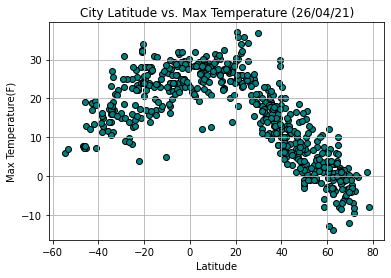

In [172]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="teal", edgecolors="black")
plt.grid(b=True, which='major')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f"City Latitude vs. Max Temperature ({date_today})")
plt.show()

## Latitude vs. Humidity Plot

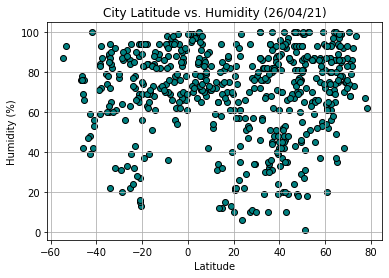

In [173]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="teal", edgecolors="black")
plt.grid(b=True, which='major')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date_today})")
plt.show()

## Latitude vs. Cloudiness Plot

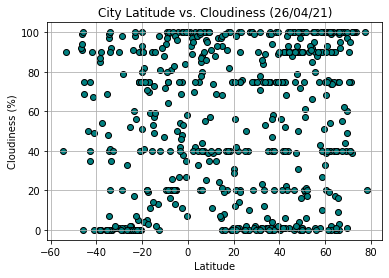

In [174]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="teal", edgecolors="black")
plt.grid(b=True, which='major')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date_today})")
plt.show()

## Latitude vs. Wind Speed Plot

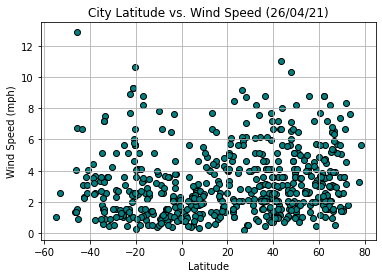

In [176]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="teal", edgecolors="black")
plt.grid(b=True, which='major')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date_today})")
plt.show()

## Linear Regression

In [177]:
northern_hemisphere = clean_city_data[clean_city_data["Lat"]>0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lázaro Cárdenas,17.9583,-102.2000,24.61,75,82,1.70,MX,1619496156
1,Avila,40.5833,-5.0000,8.33,89,56,0.89,ES,1619496171
4,Jaisinghnagar,23.7000,81.3833,35.71,6,76,1.75,IN,1619496172
5,Derzhavīnsk,51.1000,66.3167,16.87,41,100,5.53,KZ,1619496172
7,Los Llanos de Aridane,28.6585,-17.9182,19.00,72,75,0.51,ES,1619496173


In [178]:
northern_hemisphere.shape

(384, 9)

In [179]:
southern_hemisphere = clean_city_data[clean_city_data["Lat"]<0]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Bredasdorp,-34.5322,20.0403,14.00,88,97,1.54,ZA,1619496039
3,Ushuaia,-54.8000,-68.3000,6.00,87,40,1.03,AR,1619495977
6,Arraial do Cabo,-22.9661,-42.0278,23.59,78,98,0.90,BR,1619496173
10,Kavieng,-2.5744,150.7967,29.18,66,48,1.90,PG,1619496174
13,Bambous Virieux,-20.3428,57.7575,24.00,94,75,5.66,MU,1619496175


In [180]:
southern_hemisphere.shape

(179, 9)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: -0.890567015405845


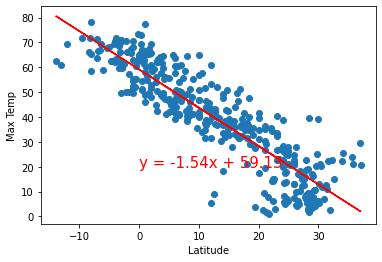

In [181]:
x_values = northern_hemisphere["Max Temp"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is: 0.6466548949337937


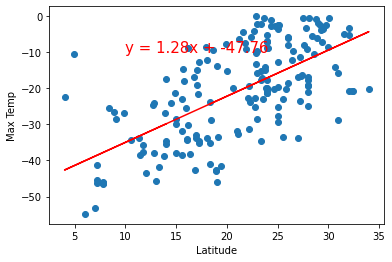

In [182]:
x_values = southern_hemisphere["Max Temp"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, -10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.11380971500501004


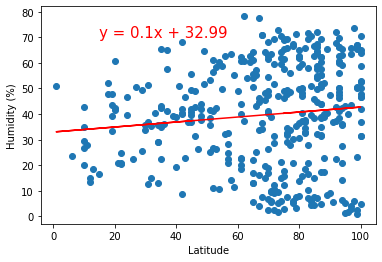

In [183]:
x_values = northern_hemisphere["Humidity"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (15, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is: 0.19221649937639598


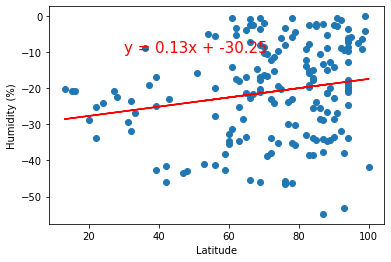

In [184]:
x_values = southern_hemisphere["Humidity"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30, -10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.055254948896647234


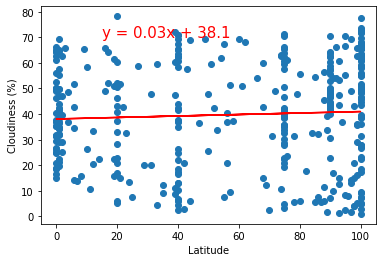

In [185]:
x_values = northern_hemisphere["Cloudiness"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (15, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is: 0.08344020938414681


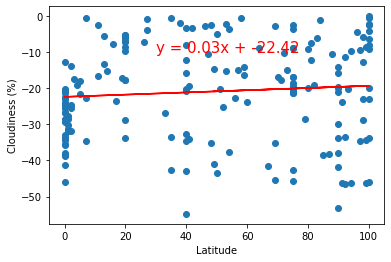

In [186]:
x_values = southern_hemisphere["Cloudiness"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30, -10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: 0.18296669824040876


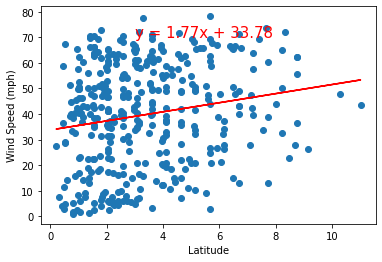

In [187]:
x_values = northern_hemisphere["Wind Speed"]
y_values = northern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (3, 70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is: -0.12882020604003425


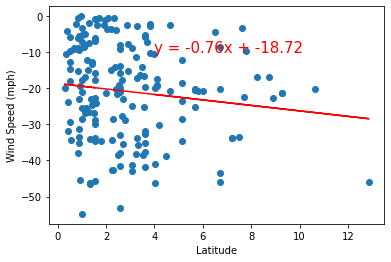

In [188]:
x_values = southern_hemisphere["Wind Speed"]
y_values = southern_hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (4, -10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"r-value is: {rvalue}")
plt.show()